In [1]:
import numpy as np
from matplotlib import pyplot as plt
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import Adam
from keras.initializers import TruncatedNormal
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import ROOT
from ROOT import TH1F, TCanvas, TTree, TFile, gStyle, gMinuit, TGraph, TVectorF, gSystem, gApplication
from array import array
from sortedcontainers import SortedList
from collections import OrderedDict
from math import sqrt
from ROOT import kBlue,kRed,TMultiGraph

Using TensorFlow backend.


Welcome to JupyROOT 6.11/03


In [2]:
gApplication.ProcessFile("tdrstyle.C")

0L

In [3]:
from ROOT import setTDRStyle

In [4]:
setTDRStyle()

## Info
50=>high 50<low

In [5]:
files=SortedList([
#"pi-300GeV.txt",
#"pi-200GeV.txt",
#"pi-150GeV.txt",
#"pi-100GeV.txt",
#"pi-50GeV.txt"])
#"pi-30GeV.txt",
#"pi-20GeV.txt"]
"pi-9GeV.txt",
"pi-8GeV.txt",
"pi-7GeV.txt",
"pi-6GeV.txt",
"pi-5GeV.txt",
"pi-4GeV.txt",
"pi-3GeV.txt",
"pi-2GeV.txt"])


In [6]:
lines9x9=OrderedDict()
lines3x4=OrderedDict()

#### Getting lines of length 9 and 4
the result is a map with the file

In [7]:
for i in files:
    prefix="pi-txt/"
    lines9x9buffer=[]
    lines3x4buffer=[]
    file = open(prefix+i)
    data=file.readlines()
    for l in data:
        line=np.fromstring(l.strip(),sep=" ")
        if len(line) == 9 :
            lines9x9buffer.append(line)
        if len(line) == 4 :
            lines3x4buffer.append(line)
    lines9x9[i]=lines9x9buffer
    lines3x4[i]=lines3x4buffer

In [8]:
def shapeimages9x9(lines):
    img9x9=OrderedDict()
    for key in lines.keys():
        counter=1
        imgs=[]
        img=[]
        for line in lines[key]:
            if counter%9==0:
                img.extend(line)
                imgs.append(img)
                img=[]
            else:
                img.extend(line)
            counter=counter+1
        img9x9[key]=imgs 
    return img9x9

def shapeimages3x4(lines):
    img3x4=OrderedDict()
    for key in lines.keys():
        counter=1
        imgs=[]
        img=[]
        for line in lines[key]:
            if counter%3==0:
                img.extend(line)
                imgs.append(img)
                img=[]
            else:
                img.extend(line)
            counter=counter+1
        img3x4[key]=imgs 
    return img3x4


In [9]:
img9x9 = shapeimages9x9(lines9x9)
img3x4 = shapeimages3x4(lines3x4)

#### Plotting img

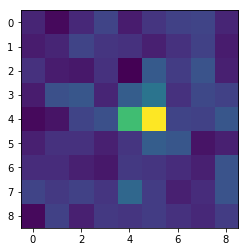

In [10]:
plt.imshow(np.array(img9x9['pi-9GeV.txt'][0]).reshape((9,9)))
plt.show()

In [11]:
#image A must be 3x4 flattened
def ImgMask3x3To9x9(A):
    B=np.zeros(81)
    #row 1
    B[0]=A[0]/6.0
    B[1]=A[0]/6.0
    B[2]=A[1]/9.0
    B[3]=A[1]/9.0
    B[4]=A[1]/9.0
    B[5]=A[2]/9.0
    B[6]=A[2]/9.0
    B[7]=A[2]/9.0
    B[8]=A[3]/3.0
    
    #row 2
    B[9] =A[0]/6.0
    B[10]=A[0]/6.0
    B[11]=A[1]/9.0
    B[12]=A[1]/9.0
    B[13]=A[1]/9.0
    B[14]=A[2]/9.0
    B[15]=A[2]/9.0
    B[16]=A[2]/9.0
    B[17]=A[3]/3.0

    #row 3
    B[18]=A[0]/6.0
    B[19]=A[0]/6.0
    B[20]=A[1]/9.0
    B[21]=A[1]/9.0
    B[22]=A[1]/9.0
    B[23]=A[2]/9.0
    B[24]=A[2]/9.0
    B[25]=A[2]/9.0
    B[26]=A[3]/3.0

    #row 4
    B[27]=A[4]/6.0
    B[28]=A[4]/6.0
    B[29]=A[5]/9.0
    B[30]=A[5]/9.0
    B[31]=A[5]/9.0
    B[32]=A[6]/9.0
    B[33]=A[6]/9.0
    B[34]=A[6]/9.0
    B[35]=A[7]/3.0

    #row 5
    B[36]=A[4]/6.0
    B[37]=A[4]/6.0
    B[38]=A[5]/9.0
    B[39]=A[5]/9.0
    B[40]=A[5]/9.0
    B[41]=A[6]/9.0
    B[42]=A[6]/9.0
    B[43]=A[6]/9.0
    B[44]=A[7]/3.0
    
    #row 6
    B[45]=A[4]/6.0
    B[46]=A[4]/6.0
    B[47]=A[5]/9.0
    B[48]=A[5]/9.0
    B[49]=A[5]/9.0
    B[50]=A[6]/9.0
    B[51]=A[6]/9.0
    B[52]=A[6]/9.0
    B[53]=A[7]/3.0

    #row 7
    B[54]=A[8]/6.0
    B[55]=A[8]/6.0
    B[56]=A[9]/9.0
    B[57]=A[9]/9.0
    B[58]=A[9]/9.0
    B[59]=A[10]/9.0
    B[60]=A[10]/9.0
    B[61]=A[10]/9.0
    B[62]=A[11]/3.0
    
    #row 8
    B[63]=A[8]/6.0
    B[64]=A[8]/6.0
    B[65]=A[9]/9.0
    B[66]=A[9]/9.0
    B[67]=A[9]/9.0
    B[68]=A[10]/9.0
    B[69]=A[10]/9.0
    B[70]=A[10]/9.0
    B[71]=A[11]/3.0

    #row 9
    B[72]=A[8]/6.0
    B[73]=A[8]/6.0
    B[74]=A[9]/9.0
    B[75]=A[9]/9.0
    B[76]=A[9]/9.0
    B[77]=A[10]/9.0
    B[78]=A[10]/9.0
    B[79]=A[10]/9.0
    B[80]=A[11]/3.0
    return B


In [12]:
img9x9_2=OrderedDict()
for img in img3x4:
    print("processing 3x4 to 9x9 %s"%(img))
    imgs=[]
    for i in img3x4[img]:
        imgs.append(ImgMask3x3To9x9(i))
    img9x9_2[img]=imgs

processing 3x4 to 9x9 pi-2GeV.txt
processing 3x4 to 9x9 pi-3GeV.txt
processing 3x4 to 9x9 pi-4GeV.txt
processing 3x4 to 9x9 pi-5GeV.txt
processing 3x4 to 9x9 pi-6GeV.txt
processing 3x4 to 9x9 pi-7GeV.txt
processing 3x4 to 9x9 pi-8GeV.txt
processing 3x4 to 9x9 pi-9GeV.txt


# Printing shapes and events
shapes for all 9x9 images and 4x3 extended to 9x9
and the number of events

In [13]:
img9x9.keys()


['pi-2GeV.txt',
 'pi-3GeV.txt',
 'pi-4GeV.txt',
 'pi-5GeV.txt',
 'pi-6GeV.txt',
 'pi-7GeV.txt',
 'pi-8GeV.txt',
 'pi-9GeV.txt']

In [14]:
print("original 9x9 images and file")
for i in img9x9:
    print("file %s \nshape "%(i))
    print(np.array(img9x9[i]).shape)
    
print("new images 9x9 from 3x4 and file")
for i in img9x9_2:
    print("file %s \nshape "%(i))
    print(np.array(img9x9_2[i]).shape)    

original 9x9 images and file
file pi-2GeV.txt 
shape 
(10394, 81)
file pi-3GeV.txt 
shape 
(24128, 81)
file pi-4GeV.txt 
shape 
(29266, 81)
file pi-5GeV.txt 
shape 
(40083, 81)
file pi-6GeV.txt 
shape 
(39844, 81)
file pi-7GeV.txt 
shape 
(36088, 81)
file pi-8GeV.txt 
shape 
(19550, 81)
file pi-9GeV.txt 
shape 
(28813, 81)
new images 9x9 from 3x4 and file
file pi-2GeV.txt 
shape 
(10394, 81)
file pi-3GeV.txt 
shape 
(24128, 81)
file pi-4GeV.txt 
shape 
(29266, 81)
file pi-5GeV.txt 
shape 
(40083, 81)
file pi-6GeV.txt 
shape 
(39844, 81)
file pi-7GeV.txt 
shape 
(36088, 81)
file pi-8GeV.txt 
shape 
(19550, 81)
file pi-9GeV.txt 
shape 
(28813, 81)


# Saving Train/Test for original 9x9 images

In [15]:
X_train = []
X_train_2ch = [] #two channels data
X_test = []
X_test_2ch = [] #two channels data
X_target = []
for i in img9x9:
    #ntest = np.array(img9x9[i]).shape[0] - 8000 
    ntest=2394
    print("proccesing %s taking 8000 event to train and %d to test"%(i,ntest))
    print(np.array(img9x9[i]).shape)
    imgs1=np.array(img9x9[i])
    imgs2=np.array(img9x9_2[i])
    print(imgs1.shape)
    print(imgs2.shape)
    imgs=[]
    imgs2ch=[]
    for index in range(imgs1.shape[0]):
        img2ch=np.dstack((imgs1[index],imgs2[index])).reshape((9,9,2))
        imgs2ch.append(img2ch)
        img = np.concatenate((imgs1[index],imgs2[index]))
        imgs.append(img)

    nimg=np.array(imgs)
    nimg2ch=np.array(imgs2ch)
    
    print(nimg.shape)
    X_train.extend(nimg[0:8000,:])
    X_train_2ch.extend(nimg2ch[0:8000,:,:,:])
    X_test.extend(nimg[8000:10394,:])
    X_test_2ch.extend(nimg2ch[8000:10394,:,:,:])
#['pi-2GeV.txt',
# 'pi-3GeV.txt',
# 'pi-4GeV.txt',
# 'pi-5GeV.txt',
# 'pi-6GeV.txt',
# 'pi-7GeV.txt',
# 'pi-8GeV.txt',
# 'pi-9GeV.txt']
    for j in [2,3,4,5,6,7,8,9]:
        if "pi-%dGeV.txt"%(j) == i:
            X_target.extend(np.full(8000,j))      
        

proccesing pi-2GeV.txt taking 8000 event to train and 2394 to test
(10394, 81)
(10394, 81)
(10394, 81)
(10394, 162)
proccesing pi-3GeV.txt taking 8000 event to train and 2394 to test
(24128, 81)
(24128, 81)
(24128, 81)
(24128, 162)
proccesing pi-4GeV.txt taking 8000 event to train and 2394 to test
(29266, 81)
(29266, 81)
(29266, 81)
(29266, 162)
proccesing pi-5GeV.txt taking 8000 event to train and 2394 to test
(40083, 81)
(40083, 81)
(40083, 81)
(40083, 162)
proccesing pi-6GeV.txt taking 8000 event to train and 2394 to test
(39844, 81)
(39844, 81)
(39844, 81)
(39844, 162)
proccesing pi-7GeV.txt taking 8000 event to train and 2394 to test
(36088, 81)
(36088, 81)
(36088, 81)
(36088, 162)
proccesing pi-8GeV.txt taking 8000 event to train and 2394 to test
(19550, 81)
(19550, 81)
(19550, 81)
(19550, 162)
proccesing pi-9GeV.txt taking 8000 event to train and 2394 to test
(28813, 81)
(28813, 81)
(28813, 81)
(28813, 162)


In [16]:
print(np.array(X_train).shape)
print(np.array(X_test).shape)
print(np.array(X_target).shape)
print(np.array(X_train_2ch).shape)
print(np.array(X_test_2ch).shape)

(64000, 162)
(19152, 162)
(64000,)
(64000, 9, 9, 2)
(19152, 9, 9, 2)


### Saving Train/Test for extended 9x9 images from 4x3

In [17]:
'''for i in img9x9_2:
    #ntest = np.array(img9x9_2[i]).shape[0] - 6000 
    ntest=1374    
    print("proccesing %s taking 6000 event to train and %d to test"%(i,ntest))
    print(np.array(img9x9_2[i]).shape)
    imgs = np.array(img9x9_2[i])
    X_train.extend(imgs[0:6000,:])
    X_test.extend(imgs[6000:7374,:])
    if "pi-300GeV.txt" == i:
        X_target.extend(np.full(6000,300))
    if "pi-200GeV.txt" == i:
        X_target.extend(np.full(6000,200))       
    if "pi-150GeV.txt" == i:
        X_target.extend(np.full(6000,150))
    if "pi-100GeV.txt" == i:
        X_target.extend(np.full(6000,100))
    if "pi-50GeV.txt" == i:
        X_target.extend(np.full(6000,50))      
    if "pi-30GeV.txt" == i:
        X_target.extend(np.full(6000,30))       
    if "pi-20GeV.txt" == i:
        X_target.extend(np.full(6000,20))       
'''        

'for i in img9x9_2:\n    #ntest = np.array(img9x9_2[i]).shape[0] - 6000 \n    ntest=1374    \n    print("proccesing %s taking 6000 event to train and %d to test"%(i,ntest))\n    print(np.array(img9x9_2[i]).shape)\n    imgs = np.array(img9x9_2[i])\n    X_train.extend(imgs[0:6000,:])\n    X_test.extend(imgs[6000:7374,:])\n    if "pi-300GeV.txt" == i:\n        X_target.extend(np.full(6000,300))\n    if "pi-200GeV.txt" == i:\n        X_target.extend(np.full(6000,200))       \n    if "pi-150GeV.txt" == i:\n        X_target.extend(np.full(6000,150))\n    if "pi-100GeV.txt" == i:\n        X_target.extend(np.full(6000,100))\n    if "pi-50GeV.txt" == i:\n        X_target.extend(np.full(6000,50))      \n    if "pi-30GeV.txt" == i:\n        X_target.extend(np.full(6000,30))       \n    if "pi-20GeV.txt" == i:\n        X_target.extend(np.full(6000,20))       \n'

In [18]:
print(np.array(X_train).shape)
print(np.array(X_test).shape)
print(np.array(X_target).shape)

(64000, 162)
(19152, 162)
(64000,)


## Creating a Keras Dense NN Model

In [19]:
# create model
model = Sequential()
model.add(Dense(256, input_dim=162, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
# Compile model


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               41728     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 41,985
Trainable params: 41,985
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(np.array(X_train),np.array(X_target), nb_epoch=10, verbose=1)

/usr/local/lib/python2.7/dist-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
64000/64000 [==============================] - 2s 39us/step - loss: 2.9288
Epoch 2/10
64000/64000 [==============================] - 2s 37us/step - loss: 2.0397
Epoch 3/10
64000/64000 [==============================] - 3s 43us/step - loss: 1.9761
Epoch 4/10
64000/64000 [==============================] - 2s 38us/step - loss: 1.9342
Epoch 5/10
64000/64000 [==============================] - 2s 37us/step - loss: 1.9039
Epoch 6/10
64000/64000 [==============================] - 2s 37us/step - loss: 1.8798
Epoch 7/10
64000/64000 [==============================] - 2s 37us/step - loss: 1.8643
Epoch 8/10
64000/64000 [==============================] - 2s 37us/step - loss: 1.8518
Epoch 9/10
64000/64000 [==============================] - 2s 37us/step - loss: 1.8388
Epoch 10/10
64000/64000 [==============================] - 2s 37us/step - loss: 1.8313


2017-11-29 16:57:25.909279: I tensorflow/core/platform/cpu_feature_guard.cc:137] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA


In [21]:
pred=model.predict(np.array(X_test))

In [22]:
pred

array([[ 2.78925586],
       [ 2.4838891 ],
       [ 3.20931315],
       ..., 
       [ 7.96459389],
       [ 6.73354435],
       [ 8.3614254 ]], dtype=float32)

In [23]:
hist=TH1F("h1","pions",100,0,10)
for i in pred:
    hist.Fill(i)


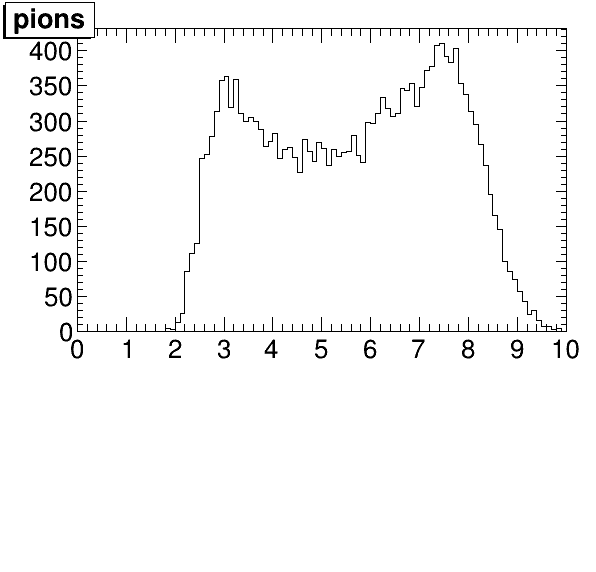

In [24]:
c=TCanvas()
hist.Draw()
c.Draw()

In [25]:
hists=[]
counter=0
for i in [2,3,4,5,6,7,8,9]:
    pred=model.predict(np.array(X_test[counter:counter+2394]))
    counter+=2394
    hist=TH1F("h%d"%(i),"pions %d"%(i),100,0,10)
    for i in pred:
        hist.Fill(i)
    hists.append(hist)

 FCN=279.489 FROM MIGRAD    STATUS=CONVERGED      77 CALLS          78 TOTAL
                     EDM=2.02914e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.72574e+02   5.18338e+00   3.12913e-02   7.78494e-06
   2  Mean         3.07740e+00   1.39517e-02   8.67441e-05   6.51272e-03
   3  Sigma        4.71671e-01   9.72821e-03   3.08438e-05   2.57738e-02


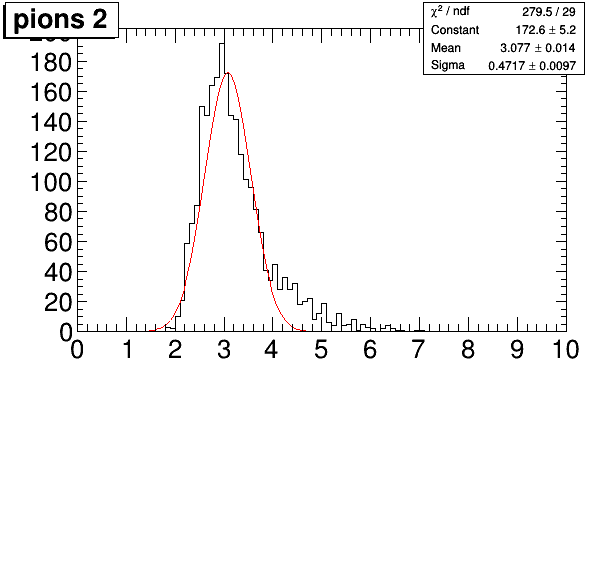

In [26]:
x1=[0,0,0,0,0,0,0,0]
y1=[0,0,0,0,0,0,0,0]
gStyle.SetOptFit()
c=TCanvas()
hists[0].Draw()
fresults=hists[0].Fit("gaus","","",1,5);
#fit.Fit("gaus","","",78,125)
#fit = hist.GetFunction("gaus")
#Mean = fit.GetParameter(1)
#Sigma = fit.GetParameter(2)
#print("Mean = %f Sigma = %f "%(Mean,Sigma))

c.Draw()
x1[0]=(1.07529e+00/2.88386e+00)
y1[0]=(1.0/sqrt(2.0))

 FCN=268.812 FROM MIGRAD    STATUS=CONVERGED      64 CALLS          65 TOTAL
                     EDM=1.73226e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.07824e+02   3.20494e+00   1.98374e-02  -1.16078e-04
   2  Mean         3.72747e+00   2.26500e-02   1.38166e-04  -1.51435e-02
   3  Sigma        7.13106e-01   1.48766e-02   3.43380e-05  -6.88781e-02


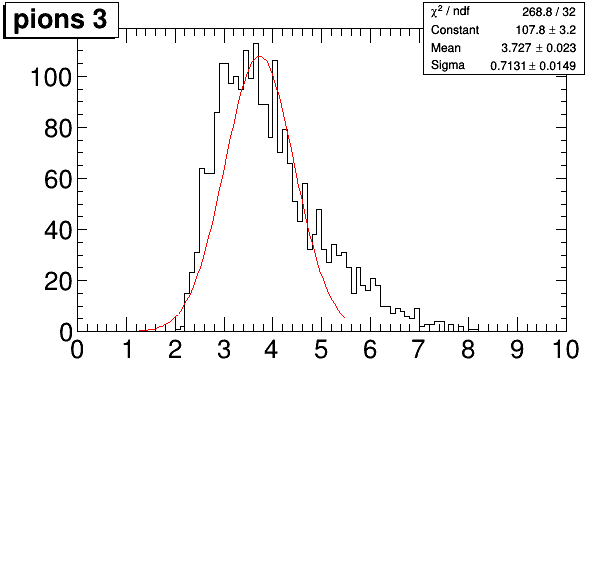

In [27]:
gStyle.SetOptFit()
c=TCanvas()
hists[1].Draw()
fresults=hists[1].Fit("gaus","","",1,5.5)
#fit.Fit("gaus","","",78,125)
#fit = hist.GetFunction("gaus")
#Mean = fit.GetParameter(1)
#Sigma = fit.GetParameter(2)
#print("Mean = %f Sigma = %f "%(Mean,Sigma))

c.Draw()
x1[1]=(1.21204e+00/3.50911e+00)
y1[1]=(1.0/sqrt(3.0))

x= 0.340646 y=0.500000
 FCN=152.971 FROM MIGRAD    STATUS=CONVERGED      58 CALLS          59 TOTAL
                     EDM=6.22976e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     7.71887e+01   2.07744e+00   1.01103e-02   7.72858e-05
   2  Mean         4.61975e+00   3.09723e-02   1.63144e-04  -1.19916e-02
   3  Sigma        1.13909e+00   2.21364e-02   2.90181e-05   3.14321e-02


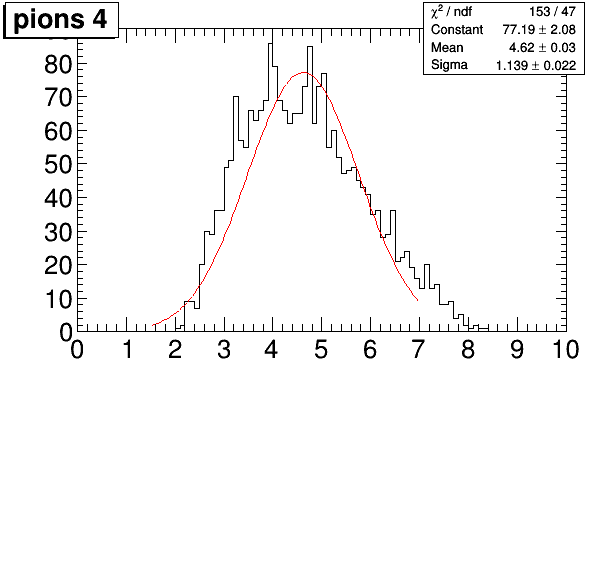

In [28]:
gStyle.SetOptFit()
c=TCanvas()
hists[2].Draw()
fresults=hists[2].Fit("gaus","","",1.5,7)
#fit.Fit("gaus","","",78,125)
#fit = hist.GetFunction("gaus")
#Mean = fit.GetParameter(1)
#Sigma = fit.GetParameter(2)
#print("Mean = %f Sigma = %f "%(Mean,Sigma))

c.Draw()
x1[2]=(1.47497e+00/4.32992e+00)
y1[2]=(1.0/sqrt(4.0))
print("x= %f y=%f"%(x1[2],y1[2]))

 FCN=73.5516 FROM MIGRAD    STATUS=CONVERGED      61 CALLS          62 TOTAL
                     EDM=1.56776e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.65670e+01   1.71856e+00   5.87555e-03  -1.97308e-04
   2  Mean         5.59982e+00   3.79550e-02   1.48075e-04  -1.54339e-03
   3  Sigma        1.45530e+00   3.04391e-02   2.40558e-05   4.08620e-02


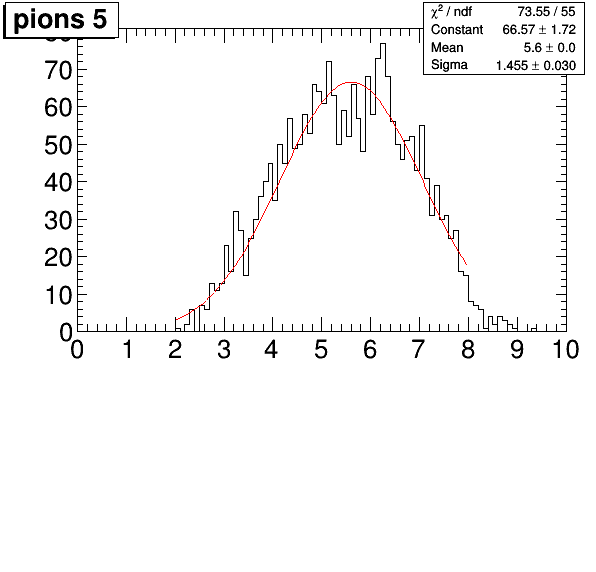

In [29]:
gStyle.SetOptFit()
c=TCanvas()
hists[3].Draw()
fresults=hists[3].Fit("gaus","","",2,8)
#fit.Fit("gaus","","",78,125)
#fit = hist.GetFunction("gaus")
#Mean = fit.GetParameter(1)
#Sigma = fit.GetParameter(2)
#print("Mean = %f Sigma = %f "%(Mean,Sigma))

c.Draw()
x1[3]=(1.58605e+00/5.36596e+00)
y1[3]=(1.0/sqrt(5.0))

 FCN=157.923 FROM MIGRAD    STATUS=CONVERGED      69 CALLS          70 TOTAL
                     EDM=1.81974e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     8.15882e+01   2.20843e+00   1.06923e-02   1.32903e-05
   2  Mean         6.22966e+00   2.73266e-02   1.46339e-04  -2.10746e-03
   3  Sigma        1.08612e+00   1.90291e-02   2.50484e-05   2.59352e-03


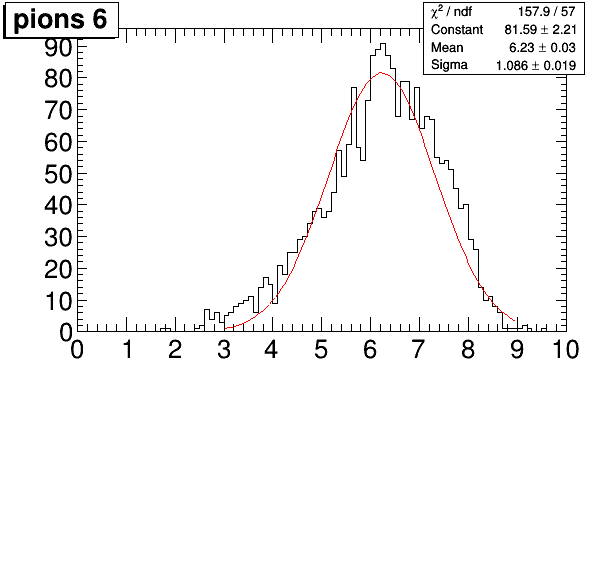

In [30]:
gStyle.SetOptFit()
c=TCanvas()
hists[4].Draw()
fresults=hists[4].Fit("gaus","","",3,9)
#fit.Fit("gaus","","",78,125)
#fit = hist.GetFunction("gaus")
#Mean = fit.GetParameter(1)
#Sigma = fit.GetParameter(2)
#print("Mean = %f Sigma = %f "%(Mean,Sigma))

c.Draw()
x1[4]=(1.37130e+00/6.12069e+00)
y1[4]=(1.0/sqrt(6.0))

 FCN=171.367 FROM MIGRAD    STATUS=CONVERGED      67 CALLS          68 TOTAL
                     EDM=3.09891e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     8.77585e+01   2.52091e+00   1.25179e-02  -7.48008e-05
   2  Mean         7.03170e+00   2.80258e-02   1.43429e-04  -1.88801e-03
   3  Sigma        9.38697e-01   1.99828e-02   3.05355e-05  -1.28902e-01


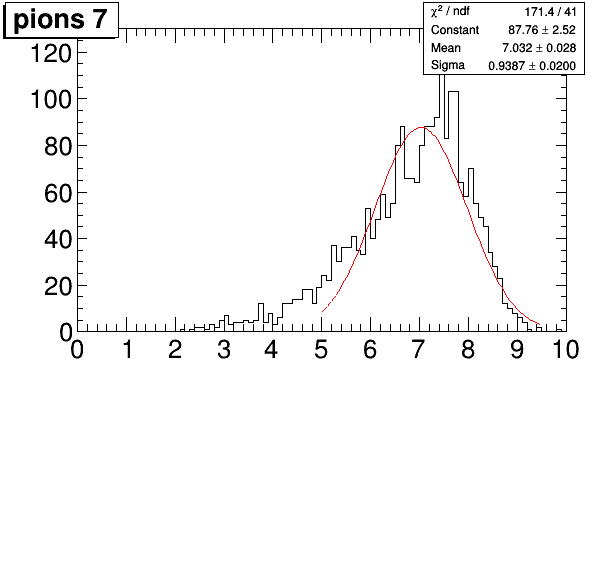

In [31]:
gStyle.SetOptFit()
c=TCanvas()
hists[5].Draw()
fresults=hists[5].Fit("gaus","","",5,9.5)
#fit.Fit("gaus","","",78,125)
#fit = hist.GetFunction("gaus")
#Mean = fit.GetParameter(1)
#Sigma = fit.GetParameter(2)
#print("Mean = %f Sigma = %f "%(Mean,Sigma))

c.Draw()
x1[5]=(1.13557e+00/6.87539e+00)
y1[5]=(1.0/sqrt(7.0))

 FCN=92.8916 FROM MIGRAD    STATUS=CONVERGED      66 CALLS          67 TOTAL
                     EDM=1.29001e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.03441e+02   2.89373e+00   1.06317e-02   1.66152e-06
   2  Mean         7.48239e+00   2.08837e-02   9.03539e-05  -5.97858e-04
   3  Sigma        8.30566e-01   1.64191e-02   2.31871e-05  -1.89863e-03


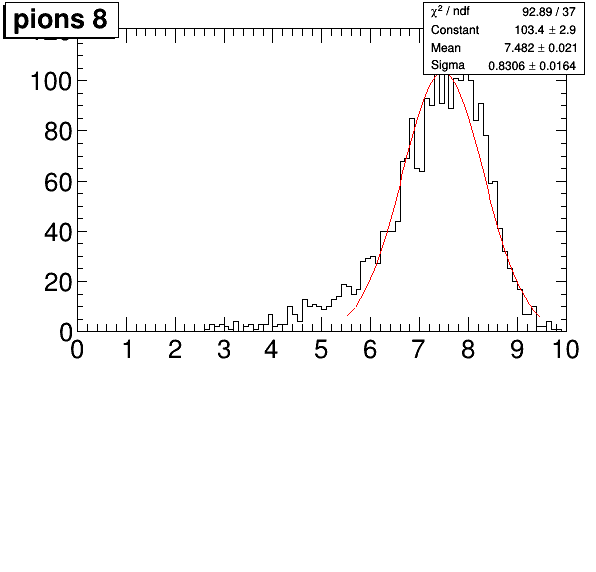

In [32]:
gStyle.SetOptFit()
c=TCanvas()
hists[6].Draw()
fresults=hists[6].Fit("gaus","","",5.5,9.5)
#fit.Fit("gaus","","",78,125)
#fit = hist.GetFunction("gaus")
#Mean = fit.GetParameter(1)
#Sigma = fit.GetParameter(2)
#print("Mean = %f Sigma = %f "%(Mean,Sigma))

c.Draw()
x1[6]=(1.05794e+00/7.25803e+00)
y1[6]=(1.0/sqrt(8.0))

 FCN=66.2695 FROM MIGRAD    STATUS=CONVERGED      68 CALLS          69 TOTAL
                     EDM=4.73907e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.08181e+02   3.14406e+00   9.16463e-03  -4.65857e-05
   2  Mean         7.79384e+00   1.94315e-02   7.70108e-05   1.74262e-03
   3  Sigma        8.45256e-01   1.93268e-02   2.27603e-05   2.45175e-02


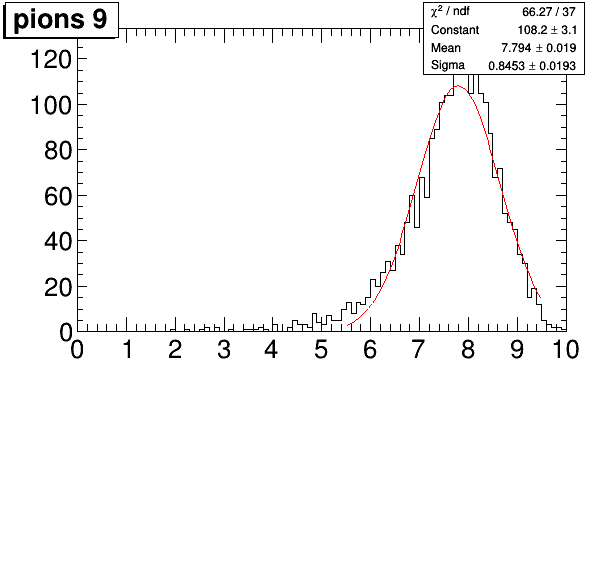

In [33]:
gStyle.SetOptFit()
c=TCanvas()
hists[7].Draw()
fresults=hists[7].Fit("gaus","","",5.5,9.5)
#fit.Fit("gaus","","",78,125)
#fit = hist.GetFunction("gaus")
#Mean = fit.GetParameter(1)
#Sigma = fit.GetParameter(2)
#print("Mean = %f Sigma = %f "%(Mean,Sigma))

c.Draw()
x1[7]=(1.05547e+00/7.51527e+00)
y1[7]=(1.0/sqrt(9.0))

In [34]:
gr1=TGraph(6)

In [71]:
for i in range(2,8,1):
    print("gr1.SetPoint(%d,%f,%f)"%(i-2,y1[i],x1[i]))
    #gr1.SetPoint (i,y1[i],x1[i])

gr1.SetPoint(0,0.500000,0.340646)
gr1.SetPoint(1,0.447214,0.295576)
gr1.SetPoint(2,0.408248,0.224043)
gr1.SetPoint(3,0.377964,0.165164)
gr1.SetPoint(4,0.353553,0.145761)
gr1.SetPoint(5,0.333333,0.140443)


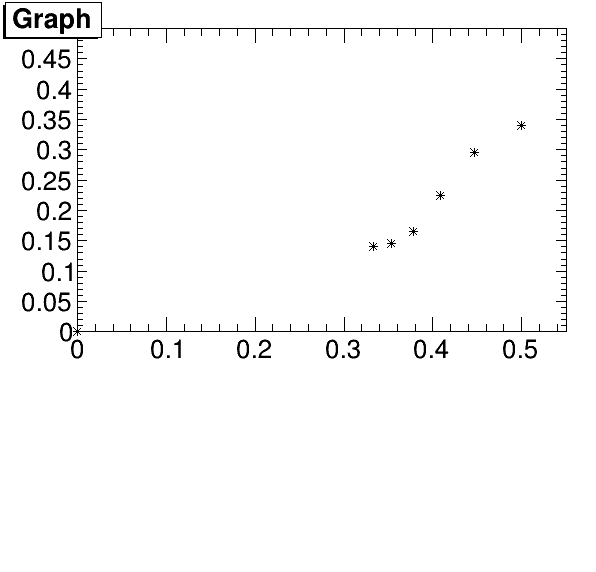

In [36]:
c=TCanvas()
gr1.GetYaxis().SetRangeUser(0.0,0.5);
#gr.GetXaxis().SetRange(18,19);
gr1.Draw("A*")
c.Draw()

In [37]:
f = TFile( 'reg1train.root', 'recreate' )
reg = TTree("reg","pions")

In [38]:
train = array( 'f', np.array(X_train).shape[1]*[ 0.] )
target = array('i',[0])
print(np.array(X_train).shape[1])

162


In [39]:
reg.Branch( 'target', target, 'target/I' )
reg.Branch( 'var', train, 'var[162]/F' )

<ROOT.TBranch object ("var") at 0x55bae733c850>

In [40]:
for i in range(np.array(X_train).shape[0]):
   target[0] = X_target[i]
   for j in range(162):
    train[j] = X_train[i][j]
   reg.Fill()

In [41]:
reg.Write()
f.Close()

## Creating a Keras CNN Model

In [42]:
# create model
model = Sequential()
model.add(Conv2D(16, activation='relu', kernel_size=3, padding='same', kernel_initializer='TruncatedNormal', input_shape=(9,9,2)))
model.add(Conv2D(16, activation='relu', kernel_size=3, padding='same', kernel_initializer='TruncatedNormal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, input_dim=162, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
# Compile model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 9, 9, 16)          304       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 16)          2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 68,673
Trainable params: 68,673
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(np.array(X_train_2ch), np.array(X_target),batch_size=25,epochs=25,verbose=1, shuffle=True)

Epoch 1/25
64000/64000 [==============================] - 8s 132us/step - loss: 2.4678
Epoch 2/25
64000/64000 [==============================] - 8s 121us/step - loss: 2.0277
Epoch 3/25
64000/64000 [==============================] - 8s 121us/step - loss: 1.9941
Epoch 4/25
64000/64000 [==============================] - 8s 121us/step - loss: 1.9698
Epoch 5/25
64000/64000 [==============================] - 8s 126us/step - loss: 1.9259
Epoch 6/25
64000/64000 [==============================] - 10s 149us/step - loss: 1.9152
Epoch 7/25
64000/64000 [==============================] - 10s 149us/step - loss: 1.8940
Epoch 8/25
64000/64000 [==============================] - 9s 134us/step - loss: 1.8797
Epoch 9/25
64000/64000 [==============================] - 8s 127us/step - loss: 1.8710
Epoch 10/25
64000/64000 [==============================] - 8s 127us/step - loss: 1.8619
Epoch 11/25
64000/64000 [==============================] - 8s 129us/step - loss: 1.8489
Epoch 12/25
64000/64000 [==============

In [44]:
pred2ch=model.predict(np.array(X_test_2ch))

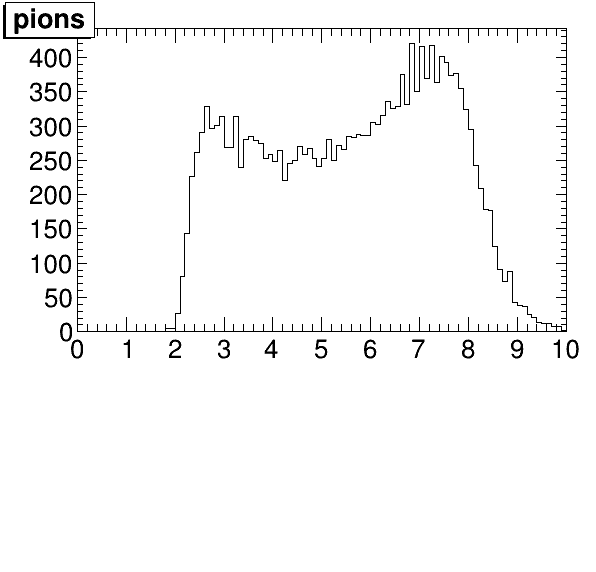

In [45]:
hist=TH1F("h11","pions",100,0,10)
for i in pred2ch:
    hist.Fill(i)
c=TCanvas()
hist.Draw()
c.Draw()

In [46]:
hists=[]
counter=0
for i in [2,3,4,5,6,7,8,9]:
    X_test_2ch
    pred=model.predict(np.array(X_test_2ch[counter:counter+2394]))
    counter+=2394
    hist=TH1F("h%d"%(i),"pions %d"%(i),100,0,10)
    for i in pred:
        hist.Fill(i)
    hists.append(hist)

 FCN=225.244 FROM MIGRAD    STATUS=CONVERGED      67 CALLS          68 TOTAL
                     EDM=3.56758e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.73832e+02   5.50058e+00   3.08226e-02  -3.06446e-06
   2  Mean         2.82490e+00   1.48330e-02   7.60085e-05   1.36792e-03
   3  Sigma        4.01694e-01   9.61532e-03   3.45191e-05  -5.62009e-03


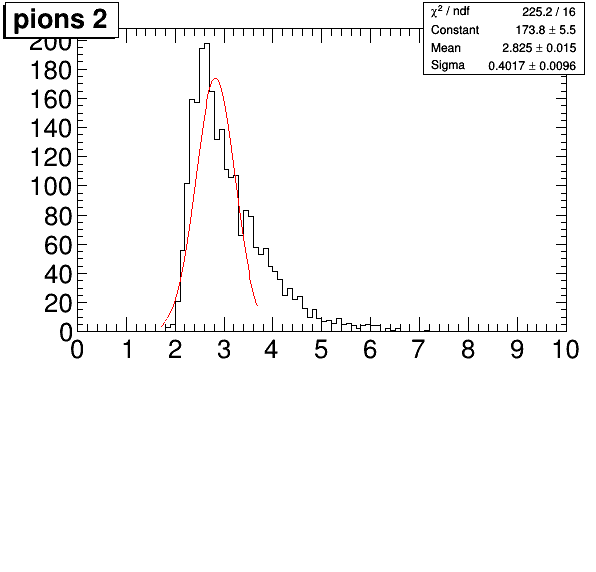

In [47]:
#vstart = [3, 1 , 0.1 , 0.01]
#step[4] = [0.1 , 0.1 , 0.01 , 0.001]
#gMinuit.mnparm(0, "Constant", [125], [0.01], 0,0,0);
#gMinuit->mnparm(1, "a2", vstart[1], step[1], 0,0,ierflg);
#gMinuit->mnparm(2, "a3", vstart[2], step[2], 0,0,ierflg);
#gMinuit->mnparm(3, "a4", vstart[3], step[3], 0,0,ierflg);

x=[0,0,0,0,0,0,0,0]
y=[0,0,0,0,0,0,0,0]
gStyle.SetOptFit()
c=TCanvas()
hists[0].Draw()
fresults=hists[0].Fit("gaus","","",1.7,3.7);
#fit.Fit("gaus","","",78,125)
#fit = hist.GetFunction("gaus")
#Mean = fit.GetParameter(1)
#Sigma = fit.GetParameter(2)
#print("Mean = %f Sigma = %f "%(Mean,Sigma))

c.Draw()
x[0]=(3.77369e-01/2.88235e+00)
y[0]=(1.0/sqrt(2.0))

 FCN=163.198 FROM MIGRAD    STATUS=CONVERGED      62 CALLS          63 TOTAL
                     EDM=5.42705e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.00314e+02   2.95621e+00   1.45697e-02  -1.98365e-05
   2  Mean         3.57225e+00   2.44616e-02   1.31796e-04  -1.09595e-03
   3  Sigma        7.81718e-01   1.95021e-02   3.87382e-05   7.75816e-03


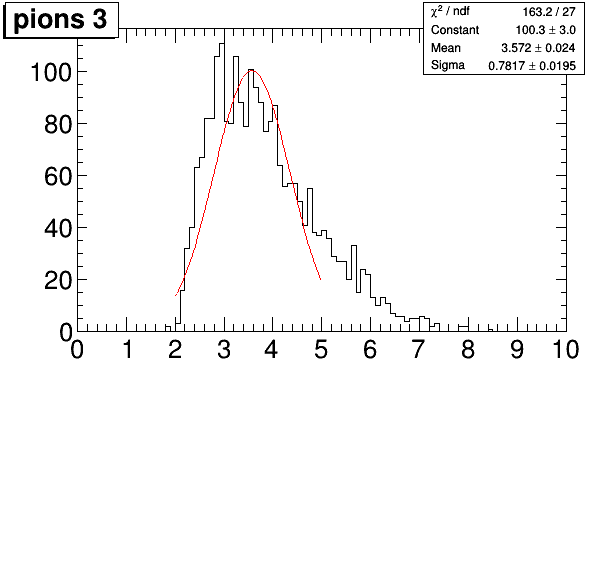

In [48]:
gStyle.SetOptFit()
c=TCanvas()
hists[1].Draw()
fresults=hists[1].Fit("gaus","","",2,5);
c.Draw()
x[1]=(7.17308e-01/3.66985e+00)
y[1]=(1.0/sqrt(3.0))

 FCN=147.677 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=1.01618e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     7.84905e+01   2.09788e+00   1.00125e-02  -3.78399e-04
   2  Mean         4.53022e+00   2.91841e-02   1.58703e-04  -1.36550e-02
   3  Sigma        1.13931e+00   2.17804e-02   2.90294e-05   1.40594e-01


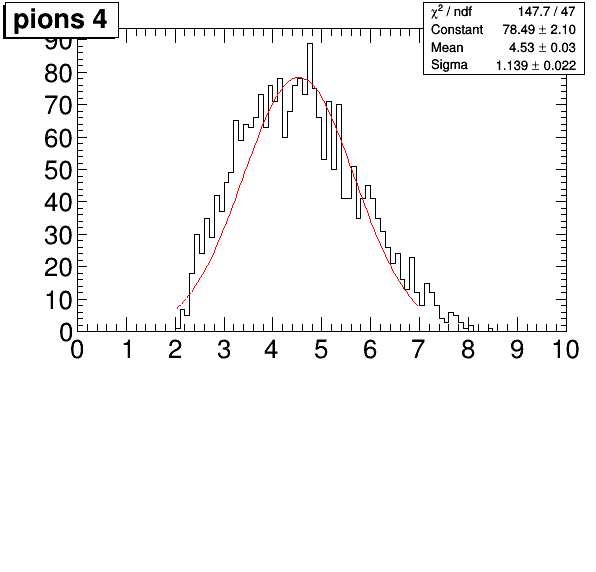

In [49]:
gStyle.SetOptFit()
setTDRStyle()
c=TCanvas()
hists[2].Draw()
fresults=hists[2].Fit("gaus","","",2,7);
c.Draw()
x[2]=(1.18218e+00/4.61462e+00)
y[2]=(1.0/sqrt(4.0))

 FCN=76.1695 FROM MIGRAD    STATUS=CONVERGED      67 CALLS          68 TOTAL
                     EDM=6.70059e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.98262e+01   1.82237e+00   6.26563e-03   1.41940e-05
   2  Mean         5.48033e+00   3.20039e-02   1.34772e-04   6.02864e-04
   3  Sigma        1.35696e+00   2.62353e-02   2.28614e-05  -1.54563e-03


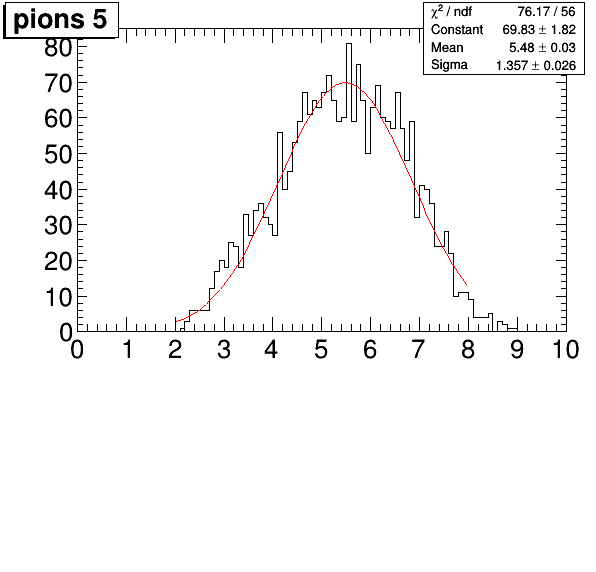

In [50]:
gStyle.SetOptFit()
setTDRStyle()
c=TCanvas()
hists[3].Draw()
fresults=hists[3].Fit("gaus","","",2,8);
c.Draw()
x[3]=(1.31061e+00/5.14678e+00)
y[3]=(1.0/sqrt(5.0))

 FCN=47.0684 FROM MIGRAD    STATUS=CONVERGED      67 CALLS          68 TOTAL
                     EDM=9.26198e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     8.36322e+01   2.40599e+00   6.12305e-03   3.66676e-04
   2  Mean         6.34281e+00   3.03415e-02   9.89625e-05  -3.59721e-02
   3  Sigma        1.11675e+00   3.17810e-02   2.60810e-05   1.43724e-01


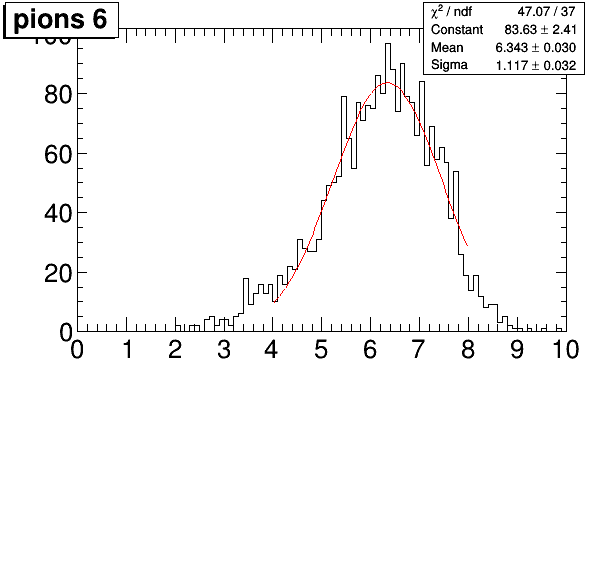

In [51]:
gStyle.SetOptFit()
setTDRStyle()
c=TCanvas()
hists[4].Draw()
fresults=hists[4].Fit("gaus","","",4,8)
c.Draw()
x[4]=(1.03069e+00/6.03621e+00)
y[4]=(1.0/sqrt(6.0))

 FCN=56.5177 FROM MIGRAD    STATUS=CONVERGED      68 CALLS          69 TOTAL
                     EDM=1.41899e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     9.51893e+01   2.77638e+00   7.92307e-03   3.26607e-05
   2  Mean         7.01731e+00   2.56190e-02   8.35043e-05  -5.90511e-03
   3  Sigma        8.76434e-01   2.22349e-02   2.35758e-05   5.76311e-03


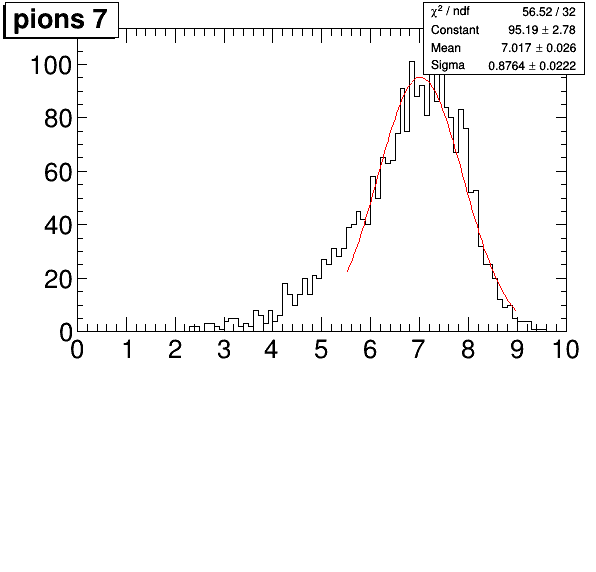

In [52]:
gStyle.SetOptFit()
setTDRStyle()
c=TCanvas()
hists[5].Draw()
fresults=hists[5].Fit("gaus","","",5.5,9);
c.Draw()
x[5]=(9.77725e-01/7.19604e+00)
y[5]=(1.0/sqrt(7.0))

 FCN=38.4309 FROM MIGRAD    STATUS=CONVERGED      68 CALLS          69 TOTAL
                     EDM=1.05206e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.07529e+02   3.18475e+00   7.32580e-03   9.95865e-05
   2  Mean         7.44413e+00   2.16589e-02   6.41064e-05  -1.53193e-02
   3  Sigma        8.00750e-01   2.17914e-02   2.22593e-05   3.45068e-02


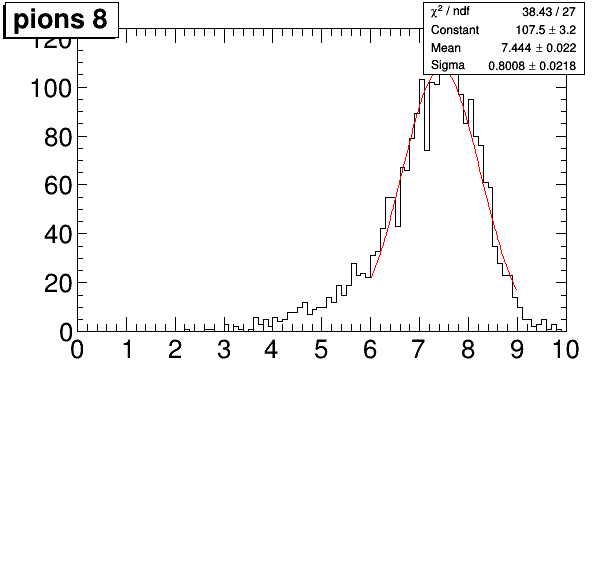

In [53]:
gStyle.SetOptFit()
setTDRStyle()
c=TCanvas()
hists[6].Draw()
fresults=hists[6].Fit("gaus","","",6,9);
c.Draw()
x[6]=(9.44637e-01/7.68449e+00)
y[6]=(1.0/sqrt(8.0))

 FCN=55.4056 FROM MIGRAD    STATUS=CONVERGED      66 CALLS          67 TOTAL
                     EDM=1.16711e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.12707e+02   3.16711e+00   8.85903e-03   8.89834e-06
   2  Mean         7.70074e+00   1.79905e-02   6.48855e-05  -1.21118e-03
   3  Sigma        7.83418e-01   1.59062e-02   1.91073e-05   7.44630e-03


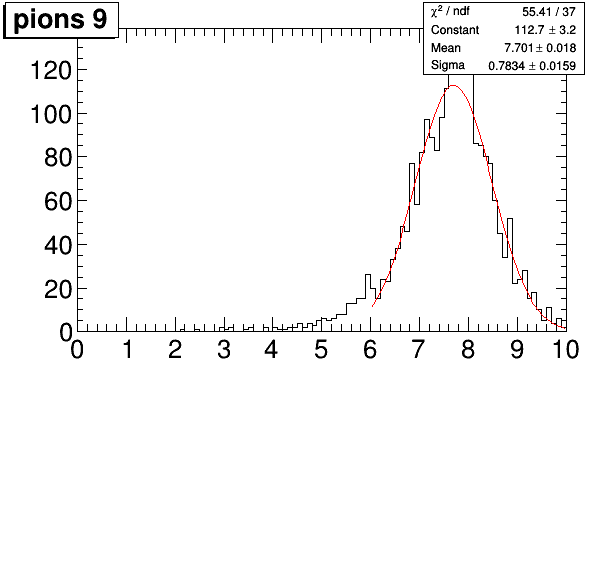

In [54]:
gStyle.SetOptFit()
setTDRStyle()
c=TCanvas()
hists[7].Draw()
fresults=hists[7].Fit("gaus","","",6,11);
c.Draw()
x[7]=(7.32823e-01/7.35892e+00)
y[7]=(1.0/sqrt(9.0))

In [65]:
gr2=TGraph(6)

In [72]:
for i in range(2,8,1):
    print("gr2.SetPoint(%d,%f,%f)"%(i-2,y[i],x[i]))
    #gr2.SetPoint (i,y[i],x[i])

gr2.SetPoint(0,0.500000,0.256181)
gr2.SetPoint(1,0.447214,0.254647)
gr2.SetPoint(2,0.408248,0.170751)
gr2.SetPoint(3,0.377964,0.135870)
gr2.SetPoint(4,0.353553,0.122928)
gr2.SetPoint(5,0.333333,0.099583)


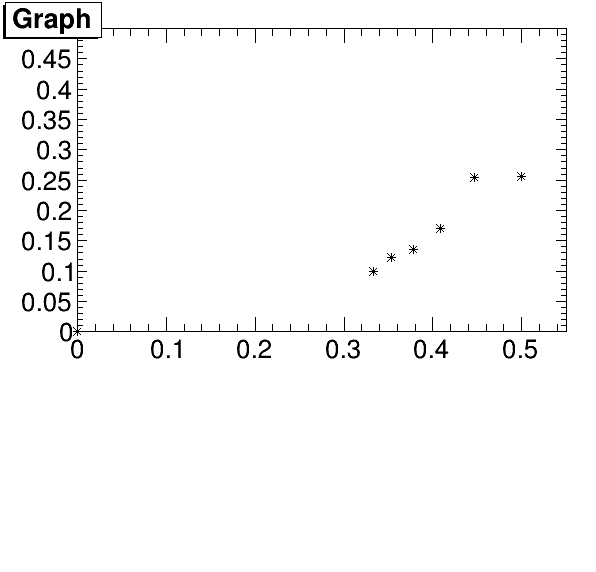

In [57]:
c=TCanvas()
gr2.GetYaxis().SetRangeUser(0.0,0.5);
#gr.GetXaxis().SetRange(18,19);
gr2.Draw("A*")
c.Draw()

In [ ]:
gr3=TGraph(6)
gr3.SetPoint(0.053196,0.141421)
gr3.SetPoint(0.094222,0.100000)
gr3.SetPoint(0.089468,0.081650)
gr3.SetPoint(0.061691,0.070711)
gr3.SetPoint(0.017715,0.057735)

In [63]:
c2=TCanvas()
gr1.SetLineColor(kBlue)
gr2.SetLineColor(kRed)
mg =TMultiGraph()
mg.Add(gr1,"p")
mg.Add(gr2,"p")
mg.Draw("a")
c2.Draw()

SystemError: void TAttLine::SetLineColor(short lcolor) =>
    problem in C++; program state has been reset


 *** Break *** segmentation violation



There was a crash.
This is the entire stack trace of all threads:

Thread 26 (Thread 0x7f99b91cf700 (LWP 13799)):
#0  0x00007f99ebe78536 in futex_abstimed_wait_cancelable (private=0, abstime=0x0, expected=0, futex_word=0x55baabbc8670) at ../sysdeps/unix/sysv/linux/futex-internal.h:205
#1  do_futex_wait (sem=sem
entry=0x55baabbc8670, abstime=0x0) at sem_waitcommon.c:111
#2  0x00007f99ebe785e4 in __new_sem_wait_slow (sem=0x55baabbc8670, abstime=0x0) at sem_waitcommon.c:181
#3  0x000055baa9e36d85 in PyThread_acquire_lock ()
#4  0x000055baa9e82a8a in PyEval_RestoreThread ()
#5  0x000055baa9f2fd29 in ?? ()
#6  0x000055baa9e5c3ca in PyEval_EvalFrameEx ()
#7  0x000055baa9e5a535 in PyEval_EvalCodeEx ()
#8  0x000055baa9e61f19 in PyEval_EvalFrameEx ()
#9  0x000055baa9e5a535 in PyEval_EvalCodeEx ()
#10 0x000055baa9e76ea8 in ?? ()
#11 0x000055baa9e48673 in PyObject_Call ()
#12 0x000055baa9e5e8a5 in PyEval_EvalFrameEx ()
#13 0x000055baa9e61c1f in PyEval_Eva